In [11]:
# import all the data
import pandas as pd
import Helper

X_train_resampled = pd.read_csv('Data/PvsUdata/X_train_resampled.csv')
X_test = pd.read_csv('Data/PvsUdata/X_test.csv')
Y_train_resampled = pd.read_csv('Data/PvsUdata/Y_train_resampled.csv')
Y_test = pd.read_csv('Data/PvsUdata/Y_test.csv')

# Combine training and test data
X_all = pd.concat([X_train_resampled, X_test])
Y_all = pd.concat([Y_train_resampled, Y_test])

In [12]:
# print the shapes of all the datasets
print(X_train_resampled.shape)
print(X_test.shape)
print(Y_train_resampled.shape)
print(Y_test.shape)
print(X_all.shape)
print(Y_all.shape)
# set header of Y_test to Target
Y_test.columns = ['Target']


(758, 11)
(120, 11)
(758, 1)
(120, 1)
(878, 11)
(878, 1)


In [8]:
from collections import Counter
print(Counter(Y_test['Target']))

Counter({1: 87, 0: 33})


LOGISTIC

In [9]:
# drop the 'pooled_fcst_std_dev_U' column from X_test and X_train_resampled
X_test = X_test.drop(columns=['pooled_fcst_std_dev_U'])
X_train_resampled = X_train_resampled.drop(columns=['pooled_fcst_std_dev_U'])
X_all = X_all.drop(columns=['pooled_fcst_std_dev_U'])


In [13]:
# implement logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# set the threshold to 0.4
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, Y_train_resampled)
Y_pred = (logistic_model.predict_proba(X_test)[:, 1] > 0.4).astype(int)
print(classification_report(Y_test, Y_pred))

print('All Data Accuracy: ', accuracy_score(Y_all, logistic_model.predict(X_all)))

# coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

              precision    recall  f1-score   support

           0       0.51      0.67      0.58        33
           1       0.86      0.76      0.80        87

    accuracy                           0.73       120
   macro avg       0.68      0.71      0.69       120
weighted avg       0.76      0.73      0.74       120

All Data Accuracy:  0.7482915717539863
                  Feature  Coefficient
5          BkgWndw3_Pos_P     2.144770
4          BkgWndw2_Pos_P     1.874932
9        BkgClsY4Y6_Neg_U     1.351796
10       BkgClsY7Y9_Neg_P     1.213826
6          BkgWndw3_Neg_P     1.198915
1           Price/Yield_P     0.699641
0           Price/Yield_U     0.187578
3   pooled_fcst_std_dev_U    -1.372255
8        BkgClsY4Y6_Pos_U    -2.463011
2   pooled_fcst_std_dev_P    -2.576266
7          BkgWndw3_Pos_U    -3.264482


/Users/maitreyeetalnikar/miniconda3/envs/SKY/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


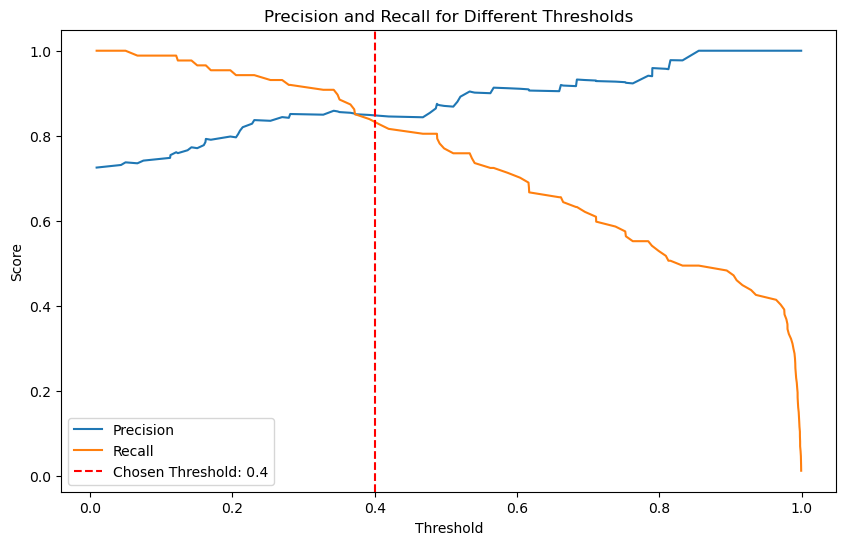

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for different threshold values
precision, recall, thresholds = precision_recall_curve(Y_test, logistic_model.predict_proba(X_test_trim)[:, 1])

# Plot precision and recall for different threshold values
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()

# Highlight the chosen threshold
chosen_threshold = 0.4  # You can change this value to your chosen threshold
plt.axvline(x=chosen_threshold, color='red', linestyle='--', label=f'Chosen Threshold: {chosen_threshold}')
plt.legend()
plt.show()

Note: you may need to restart the kernel to use updated packages.


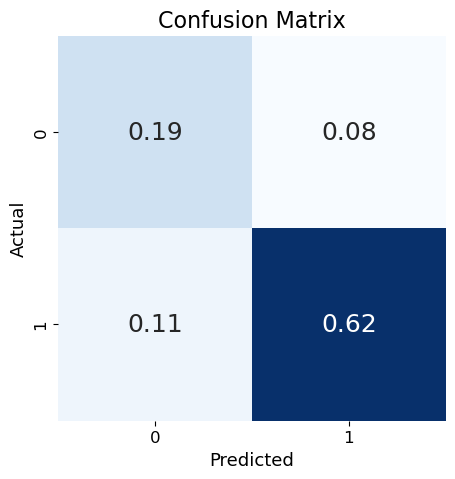

In [39]:
# # plot logistic regression model confusion matrix
# %pip install scikit-learn

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, logistic_model.predict_proba(X_test_trim2)[:,1] > 0.4, normalize='all')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
# disp.plot(cmap='Blues', values_format='d')
# plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            annot_kws={"size": 18})
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()